<a href="https://colab.research.google.com/github/GabrielMartinsz/Data-Science/blob/main/CORINTHIANS-NQA-DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<head>
<style>
  body {
    display: flex;
    flex-direction: column;
    align-items: center;
    text-align: center;
    margin: 0;
    height: 100vh;
    justify-content: center;
  }
  #img {
    max-width: 60%;
  }
</style>
</head>
<body>
<h1><strong>Corinthians | Neo Química Arena</strong></h1>
<p>Este projeto tem como objetivo realizar uma análise detalhada de <strong>310 jogos</strong> realizados até a data <strong>15/07/2023</strong> pelo Sport Club Corinthians Paulista na Neo Química Arena. A partir de técnicas de ciência de dados e estatísticas, exploraremos o desempenho do time, destacando momentos memoráveis e muito mais.</p>
</body>
<img id="img" src="https://mercadodofutebol.com/wp-content/uploads/2023/07/corinthians-v-boca-juniors-copa-conmebol-libertadores-2022-1536x1024.jpg" alt="Imagem">

</html>


<p>A Neo Química Arena, casa do Corinthians desde <strong>2014</strong>, testemunhou partidas épicas e emocionantes, imortalizadas na memória dos torcedores.</p>
<p>Vamos importar alguns pacotes necessários e os arquivos para análise. Os dados que usaremos neste projeto foram disponibilizados no Kaggle por <a href="https://www.kaggle.com/datasets/danilosoares/arena-corinthians" target="_blank">Danilo Soares</a>.
</p>

In [ ]:
# Importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import warnings

# Importar os arquivos

df_jogos = pd.read_csv('/content/drive/MyDrive/Dataset NQA/A - Jogos.csv', encoding='latin-1')

# Define o estilo padrão dos gráficos do Seaborn para ser usado no notebook
sns.set_style()

warnings.filterwarnings('ignore')

<h2><strong>Nessa primeira parte iremos conhecer nosso dataset e suas principais características</strong></h2>

In [ ]:
# Visualizar as primeiras entrada
print("Volume do DF: {}\n".format(df_jogos.shape))

df_jogos.head(5)

Volume do DF: (310, 39)



,JOGO,RESULTADO,CORINTHIANS,GOL COR,GOL VIS,VISITANTE,CIDADE - VISITANTE,UF,PAIS,DIA,...,GOL-NORTE,GOL VIS-SUL,GOL VIS-NORTE,GOL-1T,GOL-2T,GOL VIS-1T,GOL VIS-2T,ARBITRO,UF-ARBITRO,VAR
0,1,D,CORINTHIANS,0,1,FIGUEIRENSE,FLORIANOPOLIS,SC,BRA,18,...,0,0,1,0,0,0,1,JAILSON MACEDO DE FREITAS,BA,NAO
1,2,E,CORINTHIANS,1,1,BOTAFOGO,RIO DE JANEIRO,RJ,BRA,1,...,1,0,1,1,0,0,1,LEANDRO PEDRO VUADEN,RS,NAO
2,3,V,CORINTHIANS,2,1,INTERNACIONAL,PORTO ALEGRE,RS,BRA,17,...,0,1,0,2,0,0,1,WAGNER REWAY,MT,NAO
3,4,V,CORINTHIANS,3,0,BAHIA,SALVADOR,BA,BRA,23,...,1,0,0,2,1,0,0,IGOR JUNIO BENEVENUTO,MG,NAO
4,5,V,CORINTHIANS,2,0,PALMEIRAS,SAO PAULO,SP,BRA,27,...,2,0,0,0,2,0,0,SANDRO MEIRA RICCI,PE,NAO


In [ ]:
# Resumo estatístico dos dados
df_jogos.describe()

,JOGO,GOL COR,GOL VIS,DIA,MES,ANO,PUBLICO,CAMISA,NUM-GOLS,GOL-SUL,GOL-NORTE,GOL VIS-SUL,GOL VIS-NORTE,GOL-1T,GOL-2T,GOL VIS-1T,GOL VIS-2T
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,155.500000,1.574194,0.722581,15.735484,6.303226,18.516129,28.681735,1.064516,2.290323,0.767742,0.803226,0.380645,0.341935,0.687097,0.877419,0.348387,0.374194
std,89.633513,1.190297,0.808815,8.846828,3.066415,2.686066,14.210204,0.304814,1.441268,0.815063,0.872071,0.604952,0.573850,0.785484,0.887420,0.569943,0.603639
min,1.000000,0.000000,0.000000,1.000000,1.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.250000,1.000000,0.000000,9.000000,4.000000,16.000000,23.628250,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,155.500000,1.000000,1.000000,16.000000,6.000000,18.000000,32.440000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,232.750000,2.000000,1.000000,23.000000,9.000000,21.000000,39.813500,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,310.000000,6.000000,5.000000,31.000000,12.000000,23.000000,46.486000,3.000000,8.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000


In [ ]:
# Verificando se o dataset possui valores nulos

df_jogos.isnull().sum()

JOGO                       0
RESULTADO                  0
CORINTHIANS                0
GOL COR                    0
GOL VIS                    0
VISITANTE                  0
CIDADE - VISITANTE         0
UF                         0
PAIS                       0
DIA                        0
MES                        0
ANO                        0
HORA                       0
DIA-SEMANA                 0
CAMPEONATO                 0
CAPITAO                    0
TECNICO                    0
TECNICO - VISITANTE        0
PUBLICO                    0
RENDA                      0
CAMISA                     0
SAIDA                      0
1 TEMPO                    0
2 TEMPO                    0
ARTILHEIROS                0
ARTILHEIROS - VISITANTE    0
NUM-GOLS                   0
PRIMEIRO GOL               0
GOL-SUL                    0
GOL-NORTE                  0
GOL VIS-SUL                0
GOL VIS-NORTE              0
GOL-1T                     0
GOL-2T                     0
GOL VIS-1T    

<h2><strong>Estatísticas Gerais</strong></h2>

<h3><strong>Vitórias, Empates e Derrotas</strong></h3>

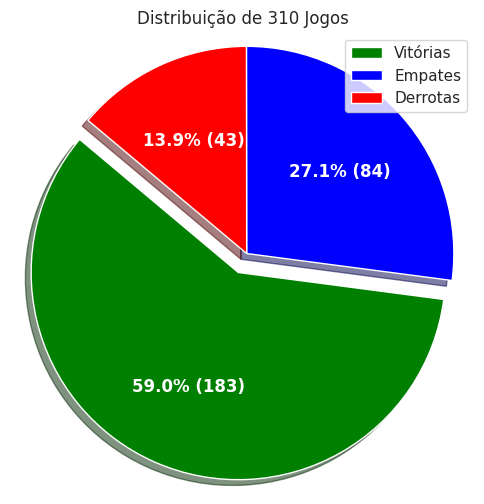

In [ ]:
# Contagem de vitórias, empates e derrotas
total_vitorias = df_jogos[df_jogos['RESULTADO'] == 'V'].shape[0]
total_empates = df_jogos[df_jogos['RESULTADO'] == 'E'].shape[0]
total_derrotas = df_jogos[df_jogos['RESULTADO'] == 'D'].shape[0]

# Dados para o gráfico de pizza
dados = [total_vitorias, total_empates, total_derrotas]
colors = ['green', 'blue', 'red']
explode = (0.1, 0, 0)  # Explodir a primeira fatia (vitórias)

# Criar o gráfico de pizza
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(dados, labels=None, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)

# Adicionar os resultados em cada fatia da pizza
for text, autotext in zip(texts, autotexts):
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    quantidade = dados[autotexts.index(autotext)]
    autotext.set_text(f"{autotext.get_text()} ({quantidade})")

# Adicionar legenda explicativa sobre as cores
legend_labels = ['Vitórias', 'Empates', 'Derrotas']
plt.legend(patches, legend_labels, loc="best")

plt.title('Distribuição de 310 Jogos')
plt.axis('equal')  # Faz o gráfico de pizza circular

# Exibir o gráfico
plt.show()

<h3><strong>Gols</strong></h3>

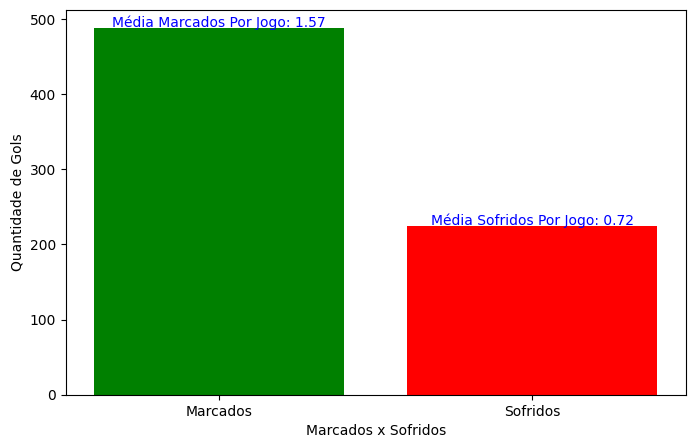

In [ ]:
plt.rcParams['figure.figsize'] = [8, 5]

# Calculando o total de gols marcados e sofridos pelo Corinthians
total_gols_marcados = df_jogos['GOL COR'].sum()
total_gols_sofridos = df_jogos['GOL VIS'].sum()

# Calculando a média de gols marcados e sofridos pelo Corinthians
media_gols_marcados = total_gols_marcados / len(df_jogos)
media_gols_sofridos = total_gols_sofridos / len(df_jogos)

# Criar uma lista com os tipos de gols
tipos_gols = ['Marcados', 'Sofridos']

# Criar uma lista com os valores correspondentes
valores_gols = [total_gols_marcados, total_gols_sofridos]

# Criar o gráfico de barras
plt.bar(tipos_gols, valores_gols, color=['green', 'red'])

# Adicionar informações no gráfico
plt.xlabel('Marcados x Sofridos')
plt.ylabel('Quantidade de Gols')

# Adicionar texto das médias no gráfico
plt.text(0, total_gols_marcados + 2, f'Média Marcados Por Jogo: {media_gols_marcados:.2f}', ha='center', color='blue')
plt.text(1, total_gols_sofridos + 2, f'Média Sofridos Por Jogo: {media_gols_sofridos:.2f}', ha='center', color='blue')

# Exibir o gráfico
plt.show()

<h3><strong>Maiores Freguesias e Carrascos</strong></h3>



<Figure size 800x300 with 0 Axes>

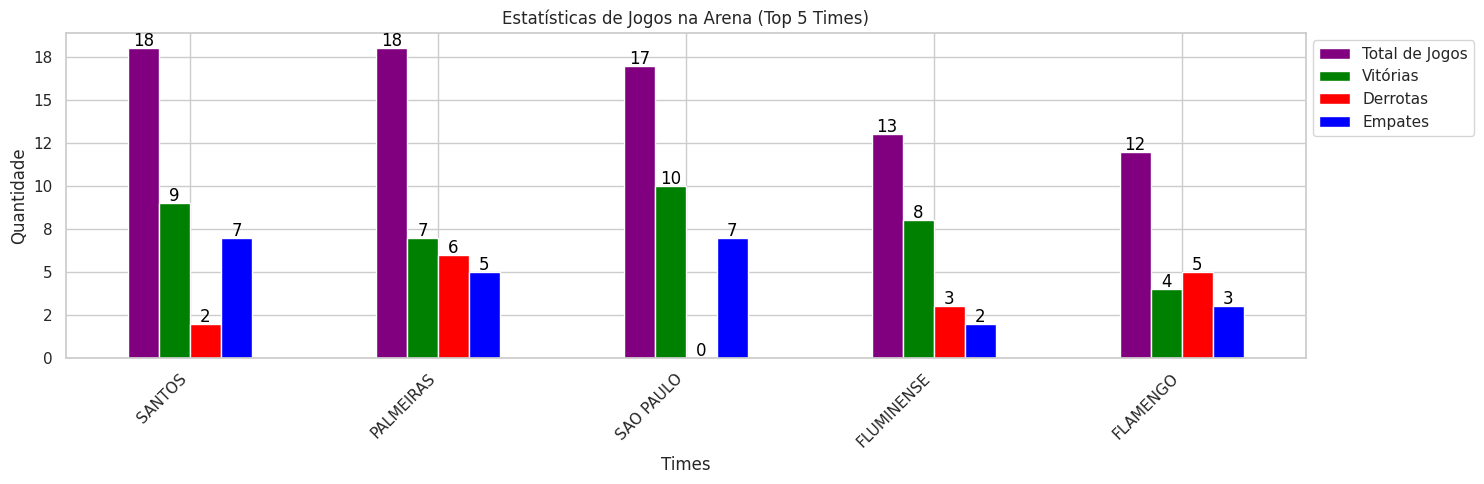

In [ ]:
# Contagem de jogos por time na Arena
top_times_na_arena = df_jogos['VISITANTE'].value_counts().head(5)

# Contagem de vitórias por time
vitorias_por_time = df_jogos[df_jogos['RESULTADO'] == 'V']['VISITANTE'].value_counts()

# Contagem de derrotas por time
derrotas_por_time = df_jogos[df_jogos['RESULTADO'] == 'D']['VISITANTE'].value_counts()

# Contagem de empates por time
empates_por_time = df_jogos[df_jogos['RESULTADO'] == 'E']['VISITANTE'].value_counts()

# Criar um DataFrame com as informações
data = pd.DataFrame({'Total de Jogos': top_times_na_arena,
                     'Vitórias': vitorias_por_time.reindex(top_times_na_arena.index).fillna(0),
                     'Derrotas': derrotas_por_time.reindex(top_times_na_arena.index).fillna(0),
                     'Empates': empates_por_time.reindex(top_times_na_arena.index).fillna(0)},
                    index=top_times_na_arena.index)

# Criar o gráfico de barras
plt.figure(figsize=(8, 3))
ax = data.plot(kind='bar', color=['purple', 'green', 'red', 'blue'])

# Adicionar informações no gráfico
plt.xlabel('Times')
plt.ylabel('Quantidade')
plt.title('Estatísticas de Jogos na Arena (Top 5 Times)')
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos no eixo x para melhor legibilidade

# Formatar o eixo Y como números inteiros
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))

# Adicionar valores das quantidades formatados nas barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Ajustar a posição da legenda
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.tight_layout()
plt.show()

<h3><strong>Competições</strong></h3>

<Figure size 1200x800 with 0 Axes>

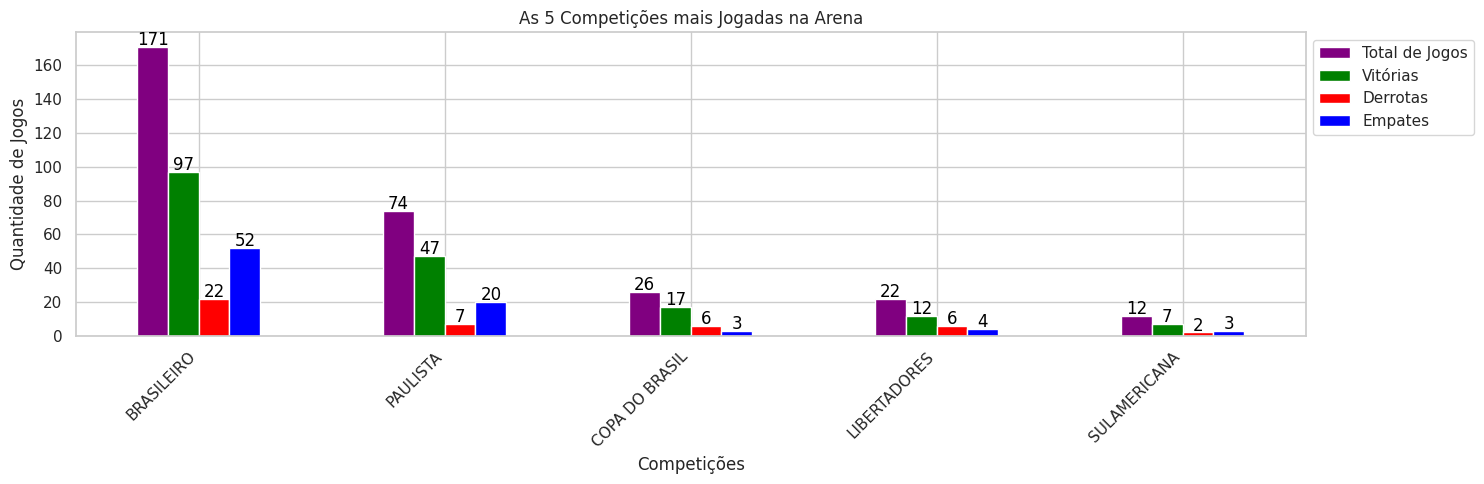

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]

# Contagem de jogos por competição na Arena
top_competicoes_na_arena = df_jogos['CAMPEONATO'].value_counts().head(5)

# Contagem de vitórias por competição
vitorias_por_competicao = df_jogos[df_jogos['RESULTADO'] == 'V']['CAMPEONATO'].value_counts()

# Contagem de derrotas por competição
derrotas_por_competicao = df_jogos[df_jogos['RESULTADO'] == 'D']['CAMPEONATO'].value_counts()

# Contagem de empates por competição
empates_por_competicao = df_jogos[df_jogos['RESULTADO'] == 'E']['CAMPEONATO'].value_counts()

# Criar um DataFrame com as informações
data = pd.DataFrame({'Total de Jogos': top_competicoes_na_arena,
                     'Vitórias': vitorias_por_competicao.reindex(top_competicoes_na_arena.index).fillna(0),
                     'Derrotas': derrotas_por_competicao.reindex(top_competicoes_na_arena.index).fillna(0),
                     'Empates': empates_por_competicao.reindex(top_competicoes_na_arena.index).fillna(0)},
                    index=top_competicoes_na_arena.index)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = data.plot(kind='bar', color=['purple', 'green', 'red', 'blue'])

# Adicionar informações no gráfico
plt.xlabel('Competições')
plt.ylabel('Quantidade de Jogos')
plt.title('As 5 Competições mais Jogadas na Arena')
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos no eixo x para melhor legibilidade

# Formatar o eixo Y como números inteiros
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))

# Adicionar valores das quantidades formatados nas barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Ajustar a posição da legenda
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.tight_layout()
plt.show()

<h3><strong>Estatísticas sobre Renda</strong></h3>

In [ ]:
# Transformando a coluna RENDA para float
df_jogos['RENDA'] = df_jogos['RENDA'].str.replace('.', '').str.replace(',', '.').astype(float);

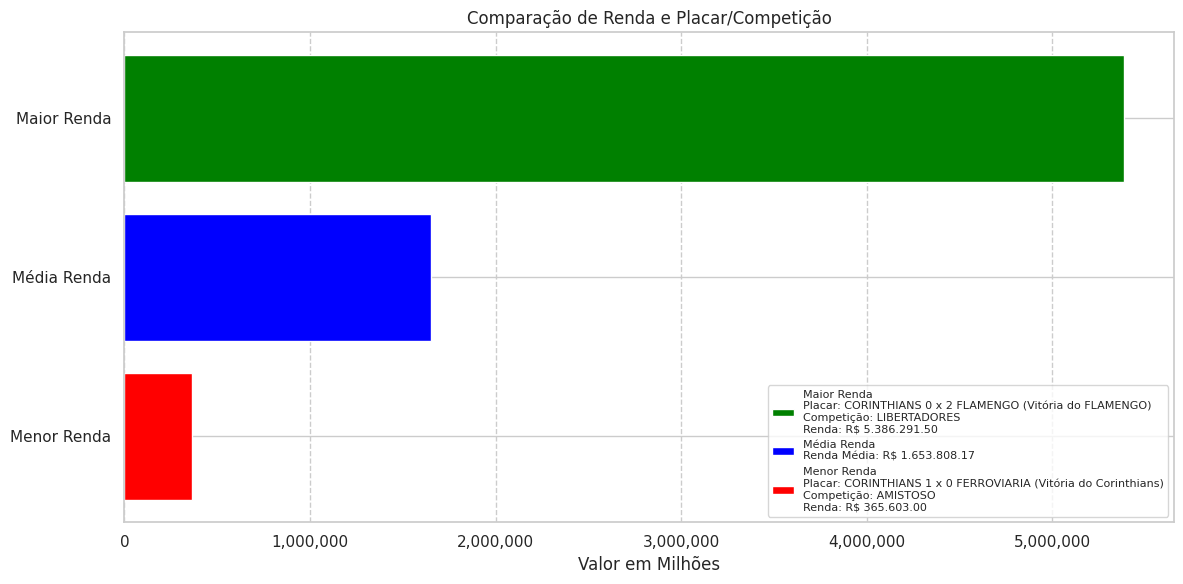

In [ ]:
plt.rcParams['figure.figsize'] = [15, 5]

# Definir uma função para formatar como valor monetário
def format_currency(value):
    parts = "{:,.2f}".format(value).split(".")
    integer_part = parts[0].replace(",", ".")
    decimal_part = parts[1]
    return "R$ {}.{}".format(integer_part, decimal_part)

# Dados para o gráfico
valores = [maior_renda, media_renda, menor_renda_sem_zero]
placares = [maior_renda_info['PLACAR_RESULTADO'], '', menor_renda_sem_zero_info['PLACAR_RESULTADO']]
competicoes = [maior_renda_info['CAMPEONATO'], '', menor_renda_sem_zero_info['CAMPEONATO']]
labels = ['Maior Renda', 'Média Renda', 'Menor Renda']
cores = ['green', 'blue', 'red']

# Criar o gráfico de barra
plt.figure(figsize=(12, 6))

# Configurar eixo Y
plt.yticks(range(len(labels)), labels)
plt.gca().invert_yaxis()  # Inverter a ordem das descrições no eixo Y

for i in range(len(valores)):
    if i == 0:
        plt.barh(i, valores[i], color=cores[i], label=labels[i])
    else:
        plt.barh(i, valores[i], color=cores[i])

# Configurações do gráfico
plt.xlabel('Valor em Milhões')
plt.title('Comparação de Renda e Placar/Competição')
plt.grid(axis='x', linestyle='--')

# Formatar eixo x como valores inteiros
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

# Adicionar legenda
legend_labels = [
    f"Maior Renda\nPlacar: {placares[0]}\nCompetição: {competicoes[0]}\nRenda: {format_currency(valores[0])}",
    f"Média Renda\nRenda Média: {format_currency(valores[1])}",
    f"Menor Renda\nPlacar: {placares[2]}\nCompetição: {competicoes[2]}\nRenda: {format_currency(valores[2])}"
]
plt.legend(legend_labels, loc='lower right', fontsize=8)

# Exibir o gráfico
plt.tight_layout()
plt.show()

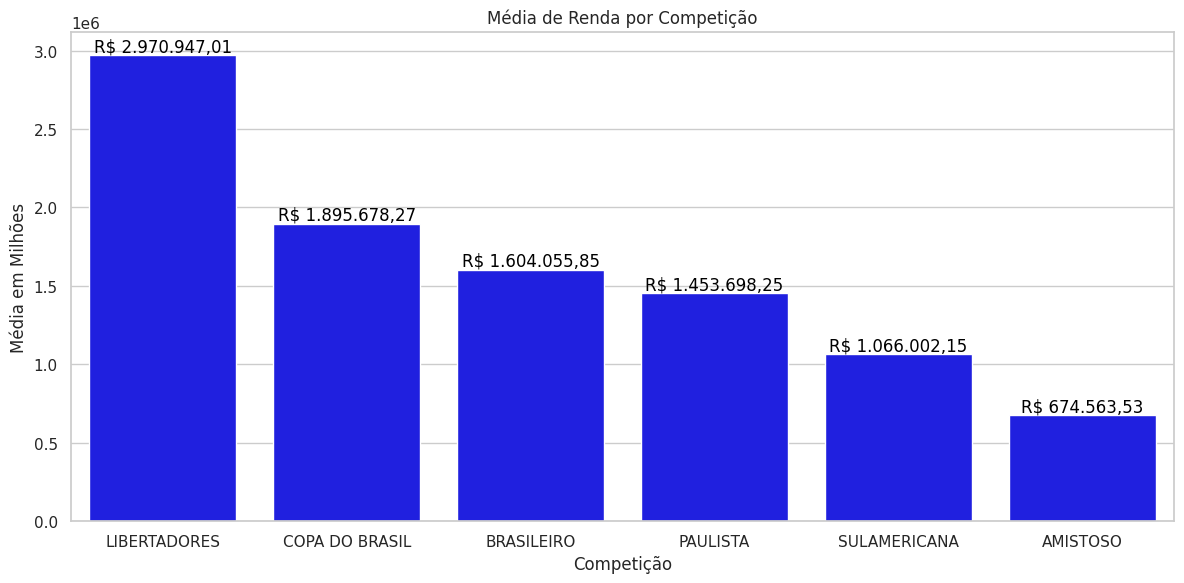

In [ ]:
# Calcular a média de renda por competição
media_renda_por_competicao = df_jogos.groupby('CAMPEONATO')['RENDA'].mean()

# Ordenar os valores de média de renda de forma decrescente
media_renda_por_competicao = media_renda_por_competicao.sort_values(ascending=False)

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=media_renda_por_competicao.index, y=media_renda_por_competicao.values, color='blue')

# Adicionar informações no gráfico
plt.xlabel('Competição')
plt.ylabel('Média em Milhões')
plt.title('Média de Renda por Competição')
plt.xticks(rotation=0)  # Mantém os rótulos das competições na horizontal

# Adicionar valores das médias formatados nas colunas
for i, v in enumerate(media_renda_por_competicao.values):
    formatted_value = "R$ {:,.2f}".format(v).replace('.', '*').replace(',', '.').replace('*', ',')
    ax.text(i, v, formatted_value, color='black', ha='center', va='bottom')

# Exibir o gráfico
plt.tight_layout()
plt.show()

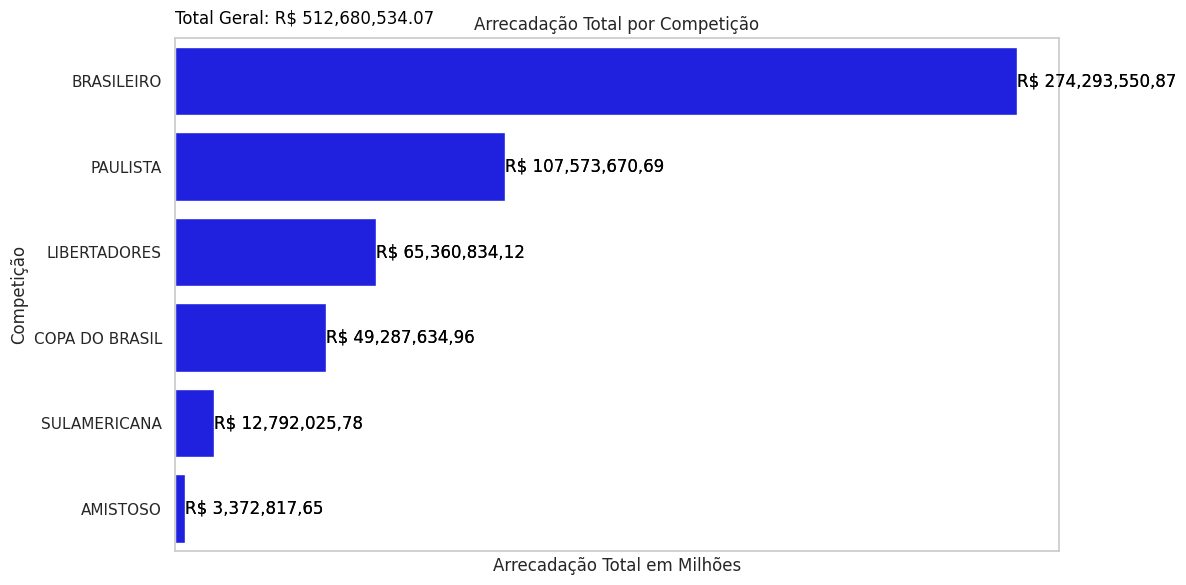

In [ ]:
# Calcular a arrecadação total por competição
arrecadacao_total_por_competicao = df_jogos.groupby('CAMPEONATO')['RENDA'].sum()

# Calcular o valor total da arrecadação
valor_total = arrecadacao_total_por_competicao.sum()

# Ordenar os valores de arrecadação total de forma decrescente
arrecadacao_total_por_competicao = arrecadacao_total_por_competicao.sort_values(ascending=False)

# Definir estilo do Seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=arrecadacao_total_por_competicao.values, y=arrecadacao_total_por_competicao.index, color='blue')

# Adicionar informações no gráfico
plt.xlabel('Arrecadação Total em Milhões')
plt.ylabel('Competição')
plt.title('Arrecadação Total por Competição')

# Adicionar valores da arrecadação total formatados nas colunas
for i, v in enumerate(arrecadacao_total_por_competicao.values):
    formatted_value = "R$ {:,.2f}".format(v).replace('.', '*').replace(',', '.').replace('*', ',')
    ax.text(v, i, formatted_value, color='black', ha='left', va='center')

# Exibir o valor total acima do gráfico como uma barra
ax.bar_label(ax.containers[0], fmt="R$ {:,.2f}", label_type="edge", fontsize=12, color='black')

# Exibir o valor total no topo da barra
ax.text(0, 1.02, "Total Geral: R$ {:,.2f}".format(valor_total), transform=ax.transAxes,
        color='black', ha='left', va='bottom', fontsize=12)

# Remover os valores do eixo X
ax.set_xticks([])

# Exibir o gráfico
plt.tight_layout()
plt.show()

<h3><strong>Conclusões</strong></h3>

<p>
  • O Corinthians em <strong>310</strong> jogos na Arena, tem
  <strong>183 Vitorias-(59%)</strong>,
  <strong>84 Empates-(27.1%)</strong> e
  <strong>43 Derrotas-(13.9%)</strong> com uma média de
  <strong>1.57 de gols feitos</strong> e
  <strong>0.72 de gols levados</strong>.
</p>

<p>
  • O maior freguês do Corinthians na Arena é o <strong>São Paulo</strong> que não tem nenhuma vitória em <strong>17 jogos</strong>,
  e o maior carrasco é o <strong>Flamengo</strong> com <strong>5 Vitórias em 12 Jogos</strong>.
</p>

<p>
  • O Corinthians tem uma <strong>Renda Média Geral de R&#36;1.653.808,17</strong>.
  Sendo que a Renda Média na Competição <strong>Libertadores é de R&#36;2.970.947,07</strong>.
</p>

<p>
  • Um <strong>Total Geral Arrecadado de R&#36;512.680.534,07</strong>.
  Sendo o <strong>Brasileirão o Maior com R&#36;274.293.550,87</strong>.
</p>
